In [2]:
import numpy as np
import torch
from sklearn.metrics import roc_auc_score
import torch.optim as optim
import argparse
from losses import CompactnessLoss, EWCLoss
from utils import get_resnet_model


In [3]:
model = get_resnet_model(resnet_type=50)
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), strid

In [4]:
def extract_features(img_path, model):
    # Load image with PIL and convert to RGB
    img = Image.open(img_path).convert("RGB")

    # Apply transformations
    transform = transforms.Compose([
        transforms.Resize([224, 224]),#resize for wideresent
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #normalize  images for imagenet
    ])

    img = transform(img).unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        features = model(img)
    return features#.squeeze().numpy()

/home/bule/anaconda3/envs/clip/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/bule/anaconda3/envs/clip/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


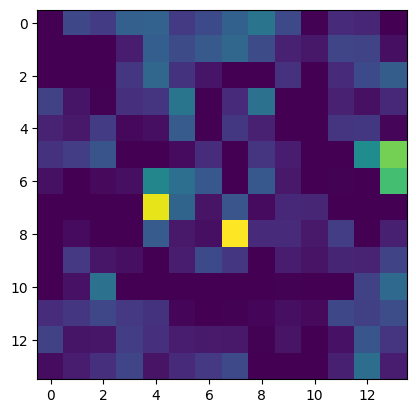

In [12]:
import torch
import torchvision.models as models
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import matplotlib.image as mpimg
import pandas as pd
import os
import torch
import torchvision.models as models
import torchvision.transforms as transforms
#from torchvision.io import read_image
from PIL import Image

import pandas as pd

# # Load the pre-trained WideResNet50 model
model = models.wide_resnet50_2(pretrained=True)

# Truncate the model at the end of the third residual block
# Adjust this based on the actual architecture of WideResNet50
# truncated_model = torch.nn.Sequential(
#     model.conv1,
#     model.bn1,
#     model.relu,
#     model.maxpool,
#     model.layer1[0],
#     model.layer1[1],
#     model.layer1[2]  # This is the third residual block
# )
#model = get_resnet_model(resnet_type=50)
model = torch.nn.Sequential(*(list(model.children())[:7]))

out=extract_features('/home/bule/projects/MVTec_Visualizer/data/mvtec_anomaly_detection/pill/test/crack/000.png', model)


plt.imshow(out[0][0,:,:])
plt.show()

In [13]:
outi=out[0]
outi_flat = outi.flatten()
outi_flat.shape

torch.Size([200704])